# QF1: Het vrije deeltje

-------------------------------------------------------------------------------------------------

### Python functies en modules

* **sympy**: symbolische rekenmodule voor python. https://www.sympy.org/en/index.html. De mogelijkheden zijn eindeloos, maar een paar handige functies:
   - integrate(f(x), (x, x0, x1)) integreert een functie f(x) van x0 tot x1. Als grens kan je simpel oneindig aangeven met **oo**
   - simplify(expression) maakt de uitdrukking (meestal) simpeler
* **sympy.physics.quantum**: quantum module binnen sympy https://docs.sympy.org/latest/modules/physics/quantum/index.html. Enkele functies die we gebruik?en tijdens het laptopcollege zijn:
   - Wavefunction(psi(x),x) om een golffunctie te definieren
   - Wavefunction.expr:  geeft de functie psi(x)
   - Wavefunction.conjugate(): geeft de complex geconjugeerde van de golffunctie
   - DifferentialOperator(g(f(x)),f(x)): definieert een quantummechanische operator
   - qapply(operator\*wavefunction): laat een operator los op een golffunctie
*  **ipywidgets**: python module voor het maken van interactieve graphics https://ipywidgets.readthedocs.io/en/latest/.
   - interactive(f(i), i=(i0,i1)): roept functie aan met 'slider bar' die waarden tussen i0 en i1 kan aannemen. Handig om bijvoorbeeld in f(i) een plaatje te maken.
* **matplotlib**: plotting in python die jullie al eerder hebben gebruikt https://matplotlib.org/. Maar nu ook te gebruiken voor het maken van animaties.
   - animation.FuncAnimation(): maak een animatie van bijvoorbeeld een tijdsafhankelijke golffunctie.
   

In [1]:
import sympy
from sympy import *
from sympy.plotting import plot
from sympy import Derivative, Function, Symbol
from sympy.physics.quantum.operator import DifferentialOperator
from sympy.physics.quantum.state import Wavefunction
from sympy.physics.quantum.qapply import qapply
import scipy.integrate as Nintegrate


%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
k0 = 10
#
# minimum certainty wave packet
#
def get_psi(x,t):
    
    C = (2/np.pi)**(0.25)
    arg = 1+2*1j*t
    F1 = np.sqrt(1./arg)
    
    psi = C*F1*np.exp(-k0**2/4)*np.exp(-(x-1j*k0/2)**2/arg)
    return psi

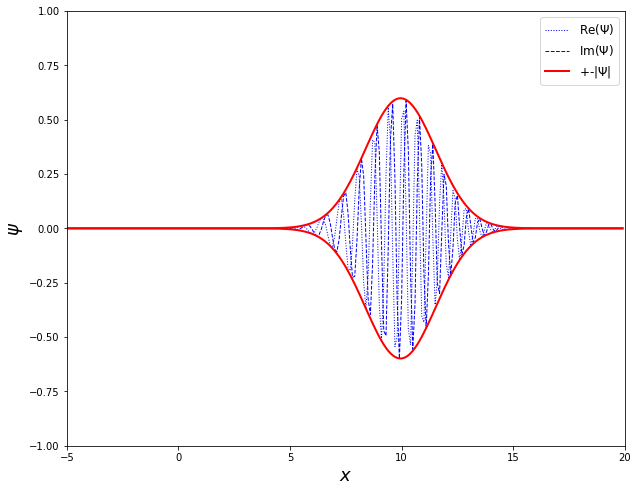

In [9]:
#
# In this animation we show both Re(Psi(x,t)), Im(Psi(x,t), +-|Psi(x,t)|. 
#
from matplotlib import animation

xlim = (-5,20)
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(10,8))
ax = plt.axes(xlim=xlim, ylim=(-1, 1))
line_re, = ax.plot([], [], lw=1, linestyle=':', color='blue', label='Re($\Psi$)')
line_im, = ax.plot([], [], lw=1, linestyle='--', color='blue', label='Im($\Psi$)')
line_abs_pos, = ax.plot([], [], lw=2, linestyle='-', color='red', label='+-|$\Psi$|')
line_abs_neg, = ax.plot([], [], lw=2, linestyle='-', color='red')

ax.legend(prop=dict(size=12))
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel(r'$\psi$',fontsize=18)


# initialization function: plot the background of each frame
def init():
    line_re.set_data([], [])
    line_im.set_data([], [])
    line_abs_pos.set_data([], [])
    line_abs_neg.set_data([], [])

    return line_re,line_im,line_abs_pos,line_abs_neg,

# animation function.  This is called sequentially
def animate(i):
    time = i*0.005
    xx = np.arange(xlim[0],xlim[1],0.1)
    val = get_psi(xx,time)
    yre = val.real
    line_re.set_data(xx, yre)
    yim = val.imag
    line_im.set_data(xx, yim)
    
    line_abs_pos.set_data(xx,+abs(val))
    line_abs_neg.set_data(xx,-abs(val))

    return line_re,line_im,line_abs_pos,line_abs_neg,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=50, blit=True)

anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

#
# Hieronder zie je maar een enkele screenshot.... 
# Voer de notebook cell hieronder uit om de animatie te bekijken

In [10]:
#
# this we use to display the animation in the jupyter notebook
#
from IPython.display import HTML

HTML(anim.to_html5_video())